In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

from keras.layers import Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Flatten, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import tensorflow as tf
import keras
import os
import time
from IPython.display import clear_output 

import tensorflow as tf
import tensorflow.keras as keras
# import tensorflow_addons as tfa
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional,Dropout
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# from keras.utils import to_categorical
from keras import backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.model_selection import KFold,StratifiedKFold

from numpy.random import seed
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

from IPython.display import clear_output 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 로드

In [3]:
# ADS_df = pd.read_csv("./custom_data/ADS_df_no_interpolation.csv", index_col=0)

GGG_df = pd.read_csv("./custom_data/GGG_df_no_interpolation.csv", index_col=0)
GGI_df = pd.read_csv("./custom_data/GGI_df_no_interpolation.csv", index_col=0)
GGJ_df = pd.read_csv("./custom_data/GGJ_df_no_interpolation.csv", index_col=0)

# GD_df = pd.read_csv("./custom_data/GD_df_no_interpolation.csv", index_col=0)

### 병합 데이터 프레임 생성

In [4]:
tmp = pd.DataFrame()

tmp['Bx_Gangneung'] = GGG_df['X']
tmp['By_Gangneung'] = GGG_df['Y']
tmp['Bz_Gangneung'] = GGG_df['Z']

tmp['Bx_Icheon'] = GGI_df['X']
tmp['By_Icheon'] = GGI_df['Y']
tmp['Bz_Icheon'] = GGI_df['Z']

tmp['Bx_Jeju'] = GGJ_df['X']
tmp['By_Jeju'] = GGJ_df['Y']
tmp['Bz_Jeju'] = GGJ_df['Z']

In [5]:
tmp2 = tmp.copy()

### 결측치 개수 확인

위에서부터 강릉(X,Y,Z) 인천(X,Y,z) 제주(X,Y,Z) 에대한 결측치 개수

In [6]:
for i in range(9):
    print(tmp.iloc[:,i].isnull().sum())

173849
173849
173029
437708
444767
437572
64660
64660
62204


### 강릉, 이천, 제주 모두 결측치가 없는 데이터 추출

In [7]:
clear_idx = np.array([False]*4207680)
for i in range(9):
    TF = tmp.iloc[:,i].isnull().values
    clear_idx = np.logical_or(clear_idx, TF)    
clear_idx = ~clear_idx

print(clear_idx.sum())

3548453


In [8]:
clear_df = tmp.iloc[clear_idx,:]

### 표준화 진행(표준화 시 성능이 더 좋음)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(clear_df)
clear_df_std = pd.DataFrame(scaler.transform(clear_df), columns=clear_df.columns)

총 354만개의 clear한 데이터 셋 생성

### 강릉 or 제주 => 이천 회귀

Bx

In [13]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,0][0:20000].values,
                                                    clear_df_std.iloc[:,3][0:20000].values, test_size=0.1)

model_Gx2Ix = linear_model(1, 1)
history = model_Gx2Ix.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=64, callbacks=[es, reLR])

2022-10-25 00:53:02.022255: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 00:53:02.919181: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6118 MB memory:  -> device: 0, name: GRID V100DX-8C, pci bus id: 0000:02:00.0, compute capability: 7.0
2022-10-25 00:53:03.030629: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0749 - mse: 0.0749 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 2/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 3/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 4/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 5/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 6/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0064 - val_mse: 0.0064

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0063 - val_

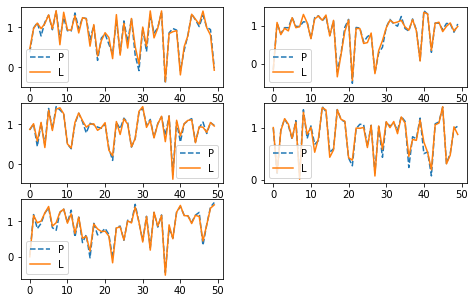

In [14]:
plot_test_regression(X_test, y_test, model_Gx2Ix)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,6][0:20000].values,
                                                    clear_df_std.iloc[:,3][0:20000].values, test_size=0.1)

model_Jx2Ix = linear_model(1, 1)
history = model_Jx2Ix.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 0.1895 - mse: 0.1895 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0210 - val_mse: 0.0210

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0207 - val_

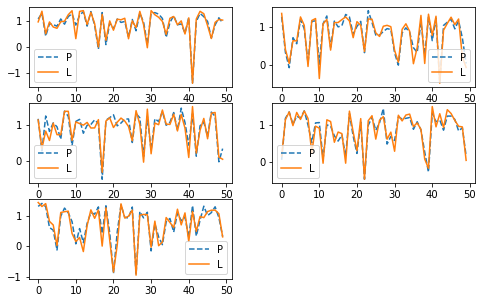

In [16]:
plot_test_regression(X_test, y_test, model_Jx2Ix)

By

In [17]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,1][0:20000].values,
                                                    clear_df_std.iloc[:,4][0:20000].values, test_size=0.1)

model_Gy2Iy = linear_model(1, 1)
history = model_Gy2Iy.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 9.8276e-04 - mse: 9.8276e-04 - val_loss: 5.0924e-04 - val_mse: 5.0924e-04
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 4.7793e-04 - mse: 4.7793e-04 - val_loss: 4.9359e-04 - val_mse: 4.9359e-04
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 4.6838e-04 - mse: 4.6838e-04 - val_loss: 4.5051e-04 - val_mse: 4.5051e-04
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 4.4835e-04 - mse: 4.4835e-04 - val_loss: 4.4953e-04 - val_mse: 4.4953e-04
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 4.4321e-04 - mse: 4.4321e-04 - val_loss: 4.4582e-04 - val_mse: 

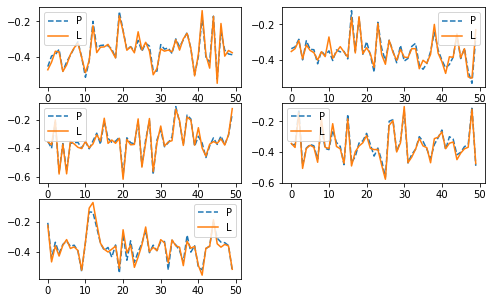

In [18]:
plot_test_regression(X_test, y_test, model_Gy2Iy)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,7][0:20000].values,
                                                    clear_df_std.iloc[:,4][0:20000].values, test_size=0.1)

model_Jy2Iy = linear_model(1, 1)
history = model_Jy2Iy.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                          verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 7.4379e-04 - mse: 7.4379e-04 - val_loss: 2.6343e-04 - val_mse: 2.6343e-04
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 2.6100e-04 - mse: 2.6100e-04 - val_loss: 2.5752e-04 - val_mse: 2.5752e-04
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 2.5510e-04 - mse: 2.5510e-04 - val_loss: 2.8246e-04 - val_mse: 2.8246e-04
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 2.5937e-04 - mse: 2.5937e-04 - val_loss: 2.5401e-04 - val_mse: 2.5401e-04
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 2.6621e-04 - mse: 2.6621e-04 - val_loss: 2.6393e-04 - val_mse: 

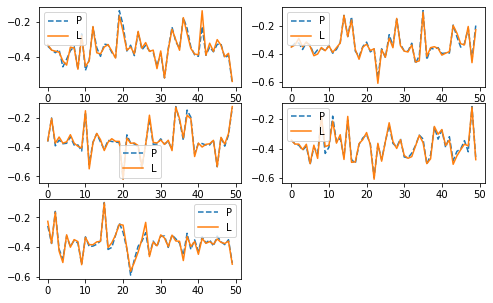

In [23]:
plot_test_regression(X_test, y_test, model_Jy2Iy)

Bz

In [33]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,2][0:20000].values,
                                                    clear_df_std.iloc[:,5][0:20000].values, test_size=0.1)

model_Gz2Iz = linear_model(1, 1)
history = model_Gz2Iz.fit(X_train, y_train, epochs = 100, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/100
141/141 [==============================] - 1s 2ms/step - loss: 0.2411 - mse: 0.2411 - val_loss: 2.8338e-04 - val_mse: 2.8338e-04
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 2.9656e-04 - mse: 2.9656e-04 - val_loss: 2.8254e-04 - val_mse: 2.8254e-04
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 2.9659e-04 - mse: 2.9659e-04 - val_loss: 2.8269e-04 - val_mse: 2.8269e-04
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 2.9676e-04 - mse: 2.9676e-04 - val_loss: 2.8227e-04 - val_mse: 2.8227e-04
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 2.9665e-04 - mse: 2.9665e-04 - val_loss: 2.8238e-04 - val_mse: 2.8238e-04

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 2.9640e-04 - mse: 2.9640e-04 - val_loss: 2.8267e-04 - val_mse: 2.8267e-04
Epoch 7/100
141/141 [============

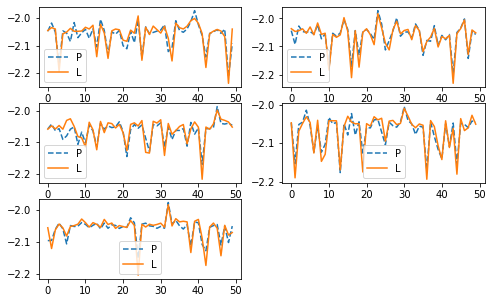

In [35]:
plot_test_regression(X_test, y_test, model_Gz2Iz)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,8][0:20000].values,
                                                    clear_df_std.iloc[:,5][0:20000].values, test_size=0.1)

model_Jz2Iz = linear_model(1, 1)
history = model_Jz2Iz.fit(X_train, y_train, epochs = 40, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/40
141/141 [==============================] - 1s 2ms/step - loss: 0.2520 - mse: 0.2520 - val_loss: 6.8487e-04 - val_mse: 6.8487e-04
Epoch 2/40
141/141 [==============================] - 0s 2ms/step - loss: 7.0286e-04 - mse: 7.0286e-04 - val_loss: 6.8360e-04 - val_mse: 6.8360e-04
Epoch 3/40
141/141 [==============================] - 0s 2ms/step - loss: 7.0020e-04 - mse: 7.0020e-04 - val_loss: 6.8175e-04 - val_mse: 6.8175e-04
Epoch 4/40
141/141 [==============================] - 0s 2ms/step - loss: 6.9874e-04 - mse: 6.9874e-04 - val_loss: 6.7487e-04 - val_mse: 6.7487e-04
Epoch 5/40
141/141 [==============================] - 0s 2ms/step - loss: 6.9335e-04 - mse: 6.9335e-04 - val_loss: 6.7045e-04 - val_mse: 6.7045e-04

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/40
141/141 [==============================] - 0s 2ms/step - loss: 6.8946e-04 - mse: 6.8946e-04 - val_loss: 6.6902e-04 - val_mse: 6.6902e-04
Epoch 7/40
141/141 [===================

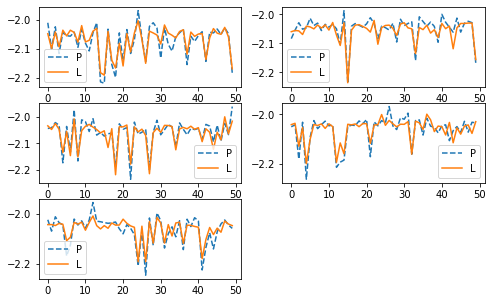

In [37]:
plot_test_regression(X_test, y_test, model_Jz2Iz)

### 강릉 or 이천 => 제주 회귀

Bx

In [38]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,3][0:20000].values,
                                                    clear_df_std.iloc[:,6][0:20000].values, test_size=0.1)

model_Ix2Jx = linear_model(1, 1)
history = model_Ix2Jx.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.3011 - mse: 0.3011 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - 

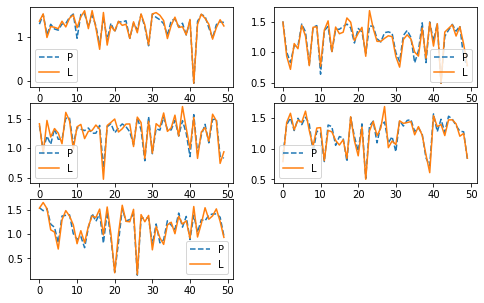

In [39]:
plot_test_regression(X_test, y_test, model_Ix2Jx)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,0][0:20000].values,
                                                    clear_df_std.iloc[:,6][0:20000].values, test_size=0.1)

model_Gx2Jx = linear_model(1, 1)
history = model_Gx2Jx.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2870 - mse: 0.2870 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - 

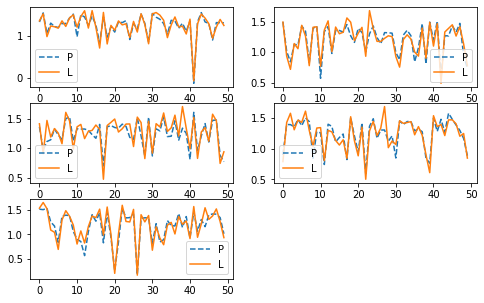

In [42]:
plot_test_regression(X_test, y_test, model_Gx2Jx)

By

In [43]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,1][0:20000].values,
                                                    clear_df_std.iloc[:,7][0:20000].values, test_size=0.1)

model_Gy2Jy = linear_model(1, 1)
history = model_Gy2Jy.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2794 - mse: 0.2794 - val_loss: 8.8091e-04 - val_mse: 8.8091e-04
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 8.3088e-04 - mse: 8.3088e-04 - val_loss: 8.7461e-04 - val_mse: 8.7461e-04
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 8.2391e-04 - mse: 8.2391e-04 - val_loss: 8.6638e-04 - val_mse: 8.6638e-04
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 8.1487e-04 - mse: 8.1487e-04 - val_loss: 8.5705e-04 - val_mse: 8.5705e-04
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 8.0725e-04 - mse: 8.0725e-04 - val_loss: 8.4824e-04 - val_mse: 8.4824e-04

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 7.9659e-04 - mse: 7.9659e-04 - val_loss: 8.4512e-04 - val_mse: 8.4512e-04
Epoch 7/200
141/141 [============

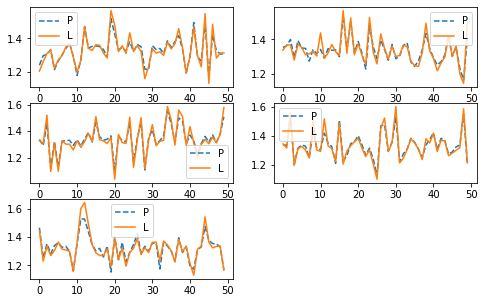

In [44]:
plot_test_regression(X_test, y_test, model_Gy2Jy)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,4][0:20000].values,
                                                    clear_df_std.iloc[:,7][0:20000].values, test_size=0.1)

model_Iy2Jy = linear_model(1, 1)
history = model_Iy2Jy.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 0.5368 - mse: 0.5368 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.3399e-04 - val_mse: 8.3399e-04
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 5.0130e-04 - mse: 5.0130e-04 - val_loss: 3.9878e-04 - val_mse: 3.9878e-04
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 3.4710e-04 - mse: 3.4710e-04 - val_loss: 3.4274e-04 - val_mse: 3.4274e-04
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 3.1085e-04 - mse: 3.1085e-04 - val_loss: 3.1433e-04 - val_mse: 3.1433e-04
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 2.9776e-04 - mse: 2.9776e-04 - val_loss: 3.0540e-04 - val_mse: 3.0540e-04
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 2.8886e-04 - mse: 2.8886e-04 - val_loss: 2.9902e-04 - v

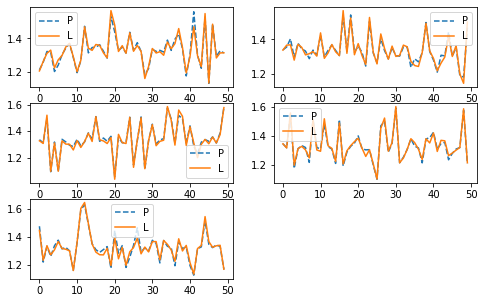

In [47]:
plot_test_regression(X_test, y_test, model_Iy2Jy)

Bz

In [48]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,5][0:20000].values,
                                                    clear_df_std.iloc[:,8][0:20000].values, test_size=0.1)

model_Iz2Jz = linear_model(1, 1)
history = model_Iz2Jz.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2313 - mse: 0.2313 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_

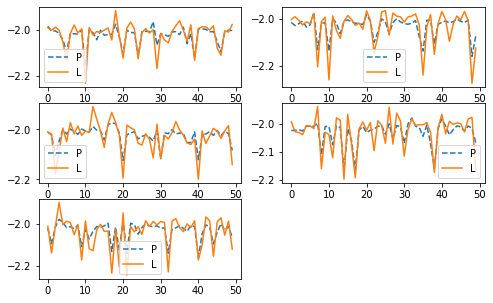

In [49]:
plot_test_regression(X_test, y_test, model_Iz2Jz)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,2][0:20000].values,
                                                    clear_df_std.iloc[:,8][0:20000].values, test_size=0.1)

model_Gz2Jz = linear_model(1, 1)
history = model_Gz2Jz.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2278 - mse: 0.2278 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0018 - val_mse: 0.0018

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0017 - val_

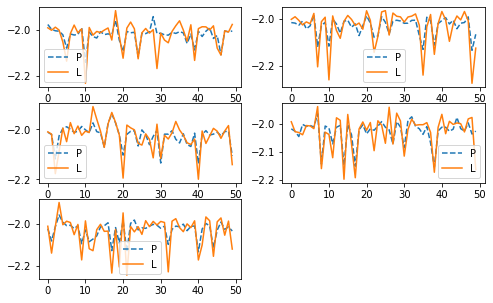

In [51]:
plot_test_regression(X_test, y_test, model_Gz2Jz)

썩 좋진 않은데 이게 그나마 좋은듯...

### 이천 or 제주 => 강릉 회귀

Bx

In [52]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,3][0:20000].values,
                                                    clear_df_std.iloc[:,0][0:20000].values, test_size=0.1)

model_Ix2Gx = linear_model(1, 1)
history = model_Ix2Gx.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2727 - mse: 0.2727 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - 

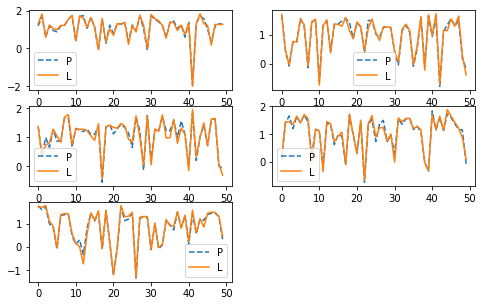

In [53]:
plot_test_regression(X_test, y_test, model_Ix2Gx)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,6][0:20000].values,
                                                    clear_df_std.iloc[:,0][0:20000].values, test_size=0.1)

model_Jx2Gx = linear_model(1, 1)
history = model_Jx2Gx.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.3493 - mse: 0.3493 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0517 - val_mse: 0.0517
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0524 - val_mse: 0.0524
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0545 - val_mse: 0.0545
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - 

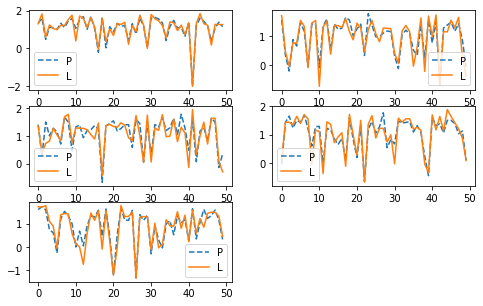

In [55]:
plot_test_regression(X_test, y_test, model_Jx2Gx)

By

In [56]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,7][0:20000].values,
                                                    clear_df_std.iloc[:,1][0:20000].values, test_size=0.1)

model_Jy2Gy = linear_model(1, 1)
history = model_Jy2Gy.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.4432 - mse: 0.4432 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0013 - val_

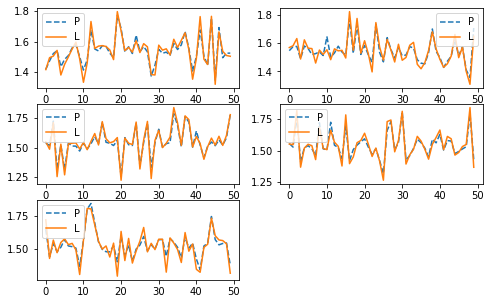

In [57]:
plot_test_regression(X_test, y_test, model_Jy2Gy)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,4][0:20000].values,
                                                    clear_df_std.iloc[:,1][0:20000].values, test_size=0.1)

model_Iy2Gy = linear_model(1, 1)
history = model_Iy2Gy.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 2ms/step - loss: 0.7699 - mse: 0.7699 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.1494e-04 - val_mse: 9.1494e-04
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 7.7156e-04 - mse: 7.7156e-04 - val_loss: 7.8476e-04 - val_mse: 7.8476e-04
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 7.0959e-04 - mse: 7.0959e-04 - val_loss: 7.4059e-04 - val_mse: 7.4059e-04
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 6.8485e-04 - mse: 6.8485e-04 - val_loss: 7.2831e-04 - val_mse: 7.2831e-04
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 6.6862e-04 - mse: 6.6862e-04 - val_loss: 7.1952e-04 - val_mse: 7.1952e-

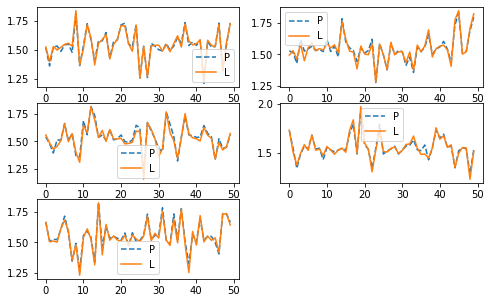

In [60]:
plot_test_regression(X_test, y_test, model_Iy2Gy)

Bz

In [61]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,5][0:20000].values,
                                                    clear_df_std.iloc[:,2][0:20000].values, test_size=0.1)

model_Iz2Gz = linear_model(1, 1)
history = model_Iz2Gz.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2556 - mse: 0.2556 - val_loss: 2.7463e-04 - val_mse: 2.7463e-04
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 2.8440e-04 - mse: 2.8440e-04 - val_loss: 2.7298e-04 - val_mse: 2.7298e-04
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 2.8448e-04 - mse: 2.8448e-04 - val_loss: 2.7287e-04 - val_mse: 2.7287e-04
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 2.8437e-04 - mse: 2.8437e-04 - val_loss: 2.7316e-04 - val_mse: 2.7316e-04
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 2.8453e-04 - mse: 2.8453e-04 - val_loss: 2.7322e-04 - val_mse: 2.7322e-04

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 2.8443e-04 - mse: 2.8443e-04 - val_loss: 2.7371e-04 - val_mse: 2.7371e-04
Epoch 7/200
141/141 [============

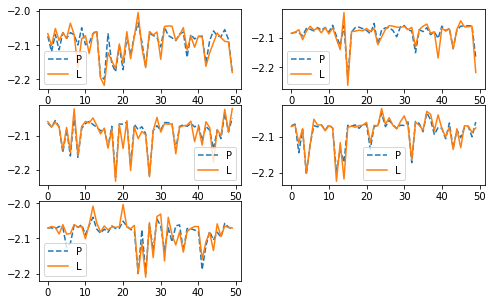

In [62]:
plot_test_regression(X_test, y_test, model_Iz2Gz)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(clear_df_std.iloc[:,8][0:20000].values,
                                                    clear_df_std.iloc[:,2][0:20000].values, test_size=0.1)

model_Jz2Gz = linear_model(1, 1)
history = model_Jz2Gz.fit(X_train, y_train, epochs = 200, validation_data= (X_test, y_test),
                    verbose=1, batch_size=128, callbacks=[es, reLR])

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.2629 - mse: 0.2629 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_

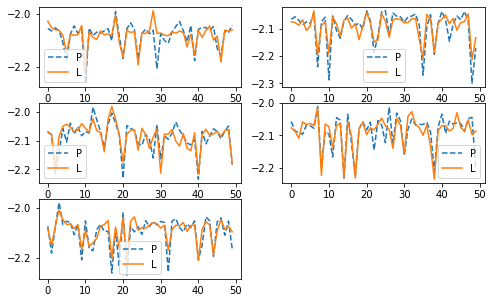

In [64]:
plot_test_regression(X_test, y_test, model_Jz2Gz)

In [67]:
model_Gx2Ix.save('./model_rg/model_Gx2Ix.h5')
model_Gx2Ix.save('./model_rg/model_Jx2Ix.h5')
model_Gy2Iy.save('./model_rg/model_Gy2Iy.h5')
model_Gy2Iy.save('./model_rg/model_Jy2Iy.h5')
model_Gz2Iz.save('./model_rg/model_Gz2Iz.h5')
model_Gz2Iz.save('./model_rg/model_Jz2Iz.h5')

model_Ix2Jx.save('./model_rg/model_Ix2Jx.h5')
model_Ix2Jx.save('./model_rg/model_Gx2Jx.h5')
model_Gy2Jy.save('./model_rg/model_Iy2Jy.h5')
model_Gy2Jy.save('./model_rg/model_Gy2Jy.h5')
model_Iz2Jz.save('./model_rg/model_Iz2Jz.h5')
model_Iz2Jz.save('./model_rg/model_Gz2Jz.h5')

model_Ix2Gx.save('./model_rg/model_Ix2Gx.h5')
model_Ix2Gx.save('./model_rg/model_Jx2Gx.h5')
model_Jy2Gy.save('./model_rg/model_Iy2Gy.h5')
model_Jy2Gy.save('./model_rg/model_Jy2Gy.h5')
model_Iz2Gz.save('./model_rg/model_Iz2Gz.h5')
model_Iz2Gz.save('./model_rg/model_Jz2Gz.h5')

from pickle import dump

dump(scaler, open('./model_rg/standard_scaler.pkl', 'wb'))

In [12]:
def linear_model(input_shape, classes):
    seed(2021)
    tf.random.set_seed(2021)
    
    input_layer = keras.layers.Input(input_shape)
    dense1 = Dense(64, activation='relu')(input_layer)
    dense2 = Dense(32, activation='relu')(dense1)
    output_layer = Dense(1)(dense2)
    
    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

def test_model(input_shape, classes):
    seed(2021)
    tf.random.set_seed(2021)
    
    input_layer = keras.layers.Input(input_shape)
    dense1 = Dense(128, activation='relu')(input_layer)
    dense1 = Dense(128, activation='relu')(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    output_layer = Dense(1)(dense2)
    
    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

def plot_test_regression(X_test, y_test, model):
    len_ = len(X_test)

    rand_val = (np.round(np.random.rand(5)*len_,0)-51).astype(int)

    plt.figure(figsize=(8,5))

    for idx, rand in enumerate(rand_val):
        plt.subplot(3, 2, idx+1)
        plt.plot(model.predict(X_test[rand:rand+50]), '--')
        plt.plot(y_test[rand:rand+50])
        plt.legend(['P', 'L'])

reLR = ReduceLROnPlateau(patience = 4,verbose = 1,factor = 0.5) 
es =EarlyStopping(monitor='val_loss', patience=8, mode='min')

In [ ]:
# new_model = tf.keras.models.load_model('iris.h5')